<a href="https://colab.research.google.com/github/steliosg23/PDS-A2/blob/main/Augmented%20Train%20Set%20Benchmark%20Models%20Finetuned%20PubMedBERT%20PDS%20A2%20Food%20Hazard_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignement 2
## Food Hazard Detection

# Benchmarks - Advanced Model: PubMedBERT

**PubMedBERT** is a **pretrained language model** based on BERT, specifically fine-tuned on **biomedical text** such as PubMed abstracts. This model is designed to capture the complexities of biomedical language, including specialized terminology and health-related concepts.

### Benefits of Using Pretrained PubMedBERT for Food Hazard Detection:
- **Domain Expertise**: Being pretrained on biomedical literature, PubMedBERT already understands key terms related to **food safety**, such as **toxins**, **bacteria**, and **allergens**, which makes it highly effective for detecting and classifying food hazards.
  
- **Faster and More Efficient**: Using a pretrained model significantly reduces training time compared to building a model from scratch. It has already learned general language patterns, so fine-tuning it on food hazard data requires less data and computational power while still achieving strong performance.

- **Task-Specific Fine-Tuning**: By fine-tuning PubMedBERT on tasks like **hazard-category**, **product-category**, **hazard**, and **product** classification, it adapts to the specific requirements of food hazard detection. This enables accurate classification of food safety incidents and associated risks.

### Task-Specific Fine-Tuning of PubMedBERT

Fine-tuning PubMedBERT for food hazard detection involves adapting its pre-trained biomedical knowledge to specific classification tasks:
- **Hazard-Category Classification**: Classifies types of hazards (e.g., microbiological, chemical).
- **Product-Category Classification**: Identifies food product types (e.g., dairy, meat).
- **Hazard Identification**: Detects specific hazards (e.g., Salmonella, pesticide).
- **Product Identification**: Pinpoints exact products (e.g., milk, spinach).

**Process**:
1. Add task-specific classification heads.
2. Fine-tune on labeled food hazard data using loss functions like cross-entropy.
3. Optimize representations for accurate domain-specific predictions.

**Benefits**:
- Adapts to food safety terminology.
- Improves classification accuracy.
- Handles diverse food hazard scenarios effectively.

## Fine-tuning Neural Network Models for Classification Tasks

### Overview

The `train_and_evaluate_nn` function performs **fine-tuning** of pre-trained transformer models for specific classification tasks. Fine-tuning involves adapting a pre-trained model to task-specific data to improve its performance on a given problem.

### Fine-tuning Process

1. **Pre-trained Model Initialization**:
   - The function uses `AutoModelForSequenceClassification.from_pretrained` to load a pre-trained transformer model (e.g., BERT, RoBERTa, PubMedBERT).
   - These models are pre-trained on large corpora to capture general language representations.

2. **Task-specific Adjustment**:
   - Fine-tuning modifies the model's weights using labeled datasets for specific tasks (e.g., hazard or product classification).
   - A classification head with `num_labels` matching the task's categories is added.

3. **Custom Data Preparation**:
   - Text data (`title` or `text`) and labels are tokenized and loaded into `TextDataset`.
   - DataLoaders provide batches for training and evaluation.

4. **Training**:
   - The model is fine-tuned for several epochs using task-specific data.
   - Loss is computed with `CrossEntropyLoss`, and weights are updated via the `Adam` optimizer.

5. **Evaluation**:
   - Predictions are decoded and evaluated using metrics like the weighted **F1-score** and classification reports.


### Outputs

- Weighted **F1-scores** for each task.
- Detailed **classification reports** for evaluation.


### Use in Food Hazard Detection:
1. **Hazard-category**: Classifies the **type of hazard** (e.g., biological, chemical).
2. **Product-category**: Identifies the **type of product** (e.g., meat, dairy) linked to a hazard.
3. **Hazard**: Detects **specific foodborne hazards** such as bacteria or contamination.
4. **Product**: Classifies the **specific product** involved in the food safety incident.

The **pretrained** nature of PubMedBERT allows for more efficient adaptation to the food hazard domain, enabling faster, more accurate identification of food safety risks.



# Method
In this task, we aim to classify food safety-related incidents based on two distinct types of input data: short texts (title) and long texts (text).

Using Advanced Model: PubMedBERT  


For each of these input types, we perform the following two subtasks:

**Subtasks (Performed Separately for  title and text):**

**Subtask 1:**

- Classify hazard-category (general hazard type).

- Classify product-category (general product type).

**Subtask 2:**

- Classify hazard (specific hazard).
- Classify product (specific product).

We use all features (year, month, day, country, and the text feature) as input.

Thus, we treat title and text as two distinct data sources, with each undergoing its own preprocessing, model training, and evaluation for all four targets.

# Mount Google Drive and Load Dataset




In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the file on Google Drive
train_path = '/content/drive/MyDrive/Data/augmented_incidents_train.csv'

# Load the dataset
df = pd.read_csv(train_path)

# Keep only the specified columns
columns_to_keep = ['year', 'month', 'day', 'country', 'title', 'text', 'hazard-category', 'product-category', 'hazard', 'product']
df = df[columns_to_keep]
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-4de93fad4643>:11: DtypeWarning: Columns (0,1,2,3,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(train_path)


,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast
...,...,...,...,...,...,...,...,...,...,...
10160,2015,10,2,ca,Sandwiches and cheese trays recalled by Sobeys...,Notice This archive of previously issued food ...,foreign bodies,"meat, egg and dairy products",metal fragment,cheese tray
10161,2015,10,2,ca,Sandwiches and cheese trays recalled by Sobeys...,Notice This archive of previously issued food ...,foreign bodies,"meat, egg and dairy products",metal fragment,cheese tray
10162,2015,10,2,ca,Sandwiches and cheese trays recalled by Sobeys...,Notice of previously issued food recalls and a...,foreign bodies,"meat, egg and dairy products",metal fragment,cheese tray
10163,2015,10,16,us,2015 - Notice of Voluntary Recall of Certain M...,"S. Martinelli & Company of Watsonville, Califo...",foreign bodies,non-alcoholic beverages,glass fragment,sparkling beverages


# Import Required Libraries




In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm  # Import tqdm for progress bars
import matplotlib.pyplot as plt  # Import matplotlib for plotting


# Configure Hyperparameters

This cell sets up the hyperparameters for model training, including:
- `max_len`: The maximum length of the input sequences.
- `batch_size`: The number of samples per batch.
- `learning_rate`: The learning rate for the optimizer.
- `epochs`: The number of training epochs.
- `model_name`: The pre-trained model (PubMedBERT in this case) to use for fine-tuning.


In [3]:
# Hyperparameters configuration
config = {
    'max_len': 256,
    'batch_size': 16,
    'learning_rate': 2e-5,
    'epochs': 5,
    'model_name': "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract"
}


# Set Device for Training

This cell checks whether a GPU is available and sets the device for training (either `cuda` for GPU or `cpu` for CPU).
It prints the device being used for training.


In [4]:
# Set device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


# Define Custom Dataset Class

Here we define a custom PyTorch `Dataset` class to handle the text data. This class takes in the input texts, labels, tokenizer, and maximum sequence length, and implements methods to return tokenized inputs and labels in a batch.
- The `__len__` method returns the number of samples in the dataset.
- The `__getitem__` method returns tokenized input data (input ids and attention mask) and the corresponding label for a given index.


In [5]:
# Custom Dataset for Text Data
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }


# Text Preprocessing - Cleaning Function

This function cleans the text by removing any non-alphanumeric characters (e.g., punctuation) and converts the text to lowercase.
This helps standardize the text for further processing, such as tokenization and model input.


In [6]:
# Function to clean text (title or text) and remove stopwords
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    text = ' '.join(text.split())
    return text


# Preprocessing the Text Data

In this step, we apply the `clean_text` function to the `title` and `text` columns of the DataFrame to clean and preprocess the text data. This ensures that all the text data used for model input is in a consistent format.


In [7]:
# Load tokenizer for Microsoft PubMedBERT model
tokenizer = AutoTokenizer.from_pretrained(config['model_name'])

# Assuming df is your DataFrame
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# Defining Features and Targets

In this cell, we define the features (columns) used for input to the model, which include `year`, `month`, `day`, and `country`. We also define the target variables for both subtasks, such as `hazard-category`, `product-category`, `hazard`, and `product`. These will be the labels we aim to predict.


In [8]:
# Define relevant features and targets
features = ['year', 'month', 'day', 'country']
targets_subtask1 = ['hazard-category','product-category']
targets_subtask2 = ['hazard','product']


# Label Encoding for Targets

Here, we encode the categorical target labels into numeric values using `LabelEncoder` from `sklearn`. This step is necessary for training the model, as models require numeric labels for classification tasks.
For each target, a new `LabelEncoder` is created, and the target column is transformed into numeric labels.


In [9]:
# Encode target labels to numeric values
label_encoders = {}
for target in targets_subtask1 + targets_subtask2:
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])
    label_encoders[target] = le


# Data Preparation for Training and Testing

This function splits the data into training and testing sets for each target variable. It also ensures that the features and corresponding targets are aligned and reset the indices for consistency. The function returns a dictionary containing the splits for each target.


In [10]:
# Prepare data for both title and text
def prepare_data(text_column):
    X = df[features + [text_column]]
    y_subtask1 = df[targets_subtask1]
    y_subtask2 = df[targets_subtask2]

    data_splits = {}
    for target in targets_subtask1 + targets_subtask2:
        X_train, X_test, y_train, y_test = train_test_split(
            X, df[target], test_size=0.2, random_state=42
        )

        # Reset indices to ensure matching
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)

        data_splits[target] = (X_train, X_test, y_train, y_test)

    return data_splits


# Prepare Data for Title and Text Subtasks

This step prepares separate data splits for the `title` and `text` columns. It uses the `prepare_data` function to generate data splits for both input types, which will be used to train and evaluate the models.


In [11]:
# Prepare data for title and text
title_splits = prepare_data('title')
text_splits = prepare_data('text')


# Model Training and Evaluation

- This function trains and evaluates the model for each target variable. It creates the DataLoader objects for the training and testing data, sets up the model, and runs the training loop. It also evaluates the model's performance by calculating the F1 score and printing the classification report.

- The training loop updates the model's weights using backpropagation, and the evaluation phase computes the model's predictions and compares them with the true labels.



In [12]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, classification_report
from tqdm import tqdm

# Function to train and evaluate neural network models
def train_and_evaluate_nn(data_splits, targets, model_type='title'):
    f1_scores = []  # List to store F1 scores for each task

    for target in targets:
        print(f"\nStarting training for task: {target}")  # Print task message

        X_train, X_test, y_train, y_test = data_splits[target]

        # Prepare text data using the tokenizer
        if model_type == 'title':
            texts_train = X_train['title'].values
            texts_test = X_test['title'].values
        else:
            texts_train = X_train['text'].values
            texts_test = X_test['text'].values

        # Create DataLoader for training and testing
        train_dataset = TextDataset(texts_train, y_train, tokenizer, config['max_len'])
        test_dataset = TextDataset(texts_test, y_test, tokenizer, config['max_len'])

        train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False)

        # Model setup
        num_labels = len(label_encoders[target].classes_)  # Corrected here
        model = AutoModelForSequenceClassification.from_pretrained(
            config['model_name'], num_labels=num_labels
        ).to(device)

        optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
        criterion = torch.nn.CrossEntropyLoss()

        # Training process
        model.train()
        for epoch in range(config['epochs']):
            print(f"Epoch {epoch+1}/{config['epochs']} - Training: {target}")
            progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", total=len(train_loader), leave=True)
            for batch in progress_bar:
                optimizer.zero_grad()
                input_ids = batch['input_ids'].squeeze(1).to(device)
                attention_mask = batch['attention_mask'].squeeze(1).to(device)
                labels = batch['label'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask)
                loss = criterion(outputs.logits, labels)
                loss.backward()
                optimizer.step()
                progress_bar.set_postfix(loss=loss.item())

        # Evaluation process
        print(f"Evaluating model for task: {target}")
        model.eval()
        y_preds = []
        y_true = []
        with torch.no_grad():
            for batch in tqdm(test_loader, desc="Evaluating", total=len(test_loader), leave=True):
                input_ids = batch['input_ids'].squeeze(1).to(device)
                attention_mask = batch['attention_mask'].squeeze(1).to(device)
                labels = batch['label'].to(device)
                outputs = model(input_ids, attention_mask=attention_mask)
                _, preds = torch.max(outputs.logits, dim=1)
                y_preds.extend(preds.cpu().numpy())
                y_true.extend(labels.cpu().numpy())

        # Decode labels back to original categories using the label encoder
        decoded_preds = label_encoders[target].inverse_transform(y_preds)
        decoded_true = label_encoders[target].inverse_transform(y_true)

        # Convert decoded labels to strings to ensure consistency
        decoded_preds = list(map(str, decoded_preds))
        decoded_true = list(map(str, decoded_true))

        # Calculate F1 score for the task
        f1 = f1_score(decoded_true, decoded_preds, average='weighted')
        f1_scores.append(f1)
        print(f"F1-Score for {target}: {f1}")

        # Print classification report
        print(f"Classification Report for {target}:\n")
        print(classification_report(decoded_true, decoded_preds, zero_division=0))

    return f1_scores  # Return the list of F1 scores for plotting



# Train and Evaluate for Title and Text Subtasks

This step trains and evaluates the model separately for the `title` and `text` features. It calls the `train_and_evaluate_nn` function for both types of input (title and text) and stores the F1 scores for comparison.


In [13]:
# Train and evaluate for both title and text
print("\nTraining and Evaluating for Title Tasks:")
title_f1_scores = train_and_evaluate_nn(title_splits, targets_subtask1 + targets_subtask2, model_type='title')

print("\nTraining and Evaluating for Text Tasks:")
text_f1_scores = train_and_evaluate_nn(text_splits, targets_subtask1 + targets_subtask2, model_type='text')



Training and Evaluating for Title Tasks:

Starting training for task: hazard-category


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: hazard-category


Training Epoch 1: 100%|██████████| 509/509 [01:21<00:00,  6.21it/s, loss=0.327]


Epoch 2/5 - Training: hazard-category


Training Epoch 2: 100%|██████████| 509/509 [01:21<00:00,  6.28it/s, loss=0.0478]


Epoch 3/5 - Training: hazard-category


Training Epoch 3: 100%|██████████| 509/509 [01:21<00:00,  6.28it/s, loss=0.0219]


Epoch 4/5 - Training: hazard-category


Training Epoch 4: 100%|██████████| 509/509 [01:21<00:00,  6.28it/s, loss=0.99]


Epoch 5/5 - Training: hazard-category


Training Epoch 5: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.297]


Evaluating model for task: hazard-category


Evaluating: 100%|██████████| 128/128 [00:06<00:00, 18.66it/s]


F1-Score for hazard-category: 0.9265972406260803
Classification Report for hazard-category:

                                precision    recall  f1-score   support

                     allergens       0.92      0.97      0.94       783
                    biological       0.97      0.93      0.95       607
                      chemical       0.96      0.91      0.93       141
food additives and flavourings       0.75      0.60      0.67         5
                foreign bodies       0.84      0.89      0.86       221
                         fraud       0.96      0.85      0.90       175
                           nan       0.00      0.00      0.00         1
          organoleptic aspects       0.73      0.57      0.64        14
                  other hazard       0.88      0.82      0.84        60
              packaging defect       1.00      0.81      0.89        26

                      accuracy                           0.93      2033
                     macro avg       0.80

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: product-category


Training Epoch 1: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.392]


Epoch 2/5 - Training: product-category


Training Epoch 2: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.673]


Epoch 3/5 - Training: product-category


Training Epoch 3: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.46]


Epoch 4/5 - Training: product-category


Training Epoch 4: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.0219]


Epoch 5/5 - Training: product-category


Training Epoch 5: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.0756]


Evaluating model for task: product-category


Evaluating: 100%|██████████| 128/128 [00:06<00:00, 18.56it/s]


F1-Score for product-category: 0.8972309658042857
Classification Report for product-category:

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.85      0.65      0.73        17
                      cereals and bakery products       0.81      0.90      0.85       208
     cocoa and cocoa preparations, coffee and tea       0.85      0.88      0.87        77
                                    confectionery       0.87      0.79      0.83        75
dietetic foods, food supplements, fortified foods       0.96      0.89      0.92        55
                                    fats and oils       0.92      1.00      0.96        12
                                   feed materials       1.00      1.00      1.00         1
                   food additives and flavourings       1.00      1.00      1.00         2
                           food contact materials       1.00      1.00      1.00     

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: hazard


Training Epoch 1: 100%|██████████| 509/509 [01:21<00:00,  6.26it/s, loss=1.96]


Epoch 2/5 - Training: hazard


Training Epoch 2: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=3.77]


Epoch 3/5 - Training: hazard


Training Epoch 3: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.0722]


Epoch 4/5 - Training: hazard


Training Epoch 4: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.0636]


Epoch 5/5 - Training: hazard


Training Epoch 5: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=0.109]


Evaluating model for task: hazard


Evaluating: 100%|██████████| 128/128 [00:06<00:00, 18.52it/s]


F1-Score for hazard: 0.8169322022786341
Classification Report for hazard:

                                                 precision    recall  f1-score   support

                                 abnormal smell       0.00      0.00      0.00         1
                                alcohol content       0.00      0.00      0.00         1
                                      alkaloids       0.67      1.00      0.80         2
                                      allergens       1.00      0.50      0.67         8
                                         almond       0.97      0.81      0.88        36
           altered organoleptic characteristics       1.00      0.50      0.67         2
                                      amygdalin       0.00      0.00      0.00         1
                         antibiotics, vet drugs       1.00      0.80      0.89         5
                                  bacillus spp.       1.00      0.83      0.91        12
                           bad sme

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: product


Training Epoch 1: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=6.36]


Epoch 2/5 - Training: product


Training Epoch 2: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=3.23]


Epoch 3/5 - Training: product


Training Epoch 3: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=5.76]


Epoch 4/5 - Training: product


Training Epoch 4: 100%|██████████| 509/509 [01:21<00:00,  6.26it/s, loss=2.78]


Epoch 5/5 - Training: product


Training Epoch 5: 100%|██████████| 509/509 [01:21<00:00,  6.27it/s, loss=2.58]


Evaluating model for task: product


Evaluating: 100%|██████████| 128/128 [00:06<00:00, 18.48it/s]


F1-Score for product: 0.5897592631135634
Classification Report for product:

                                                                        precision    recall  f1-score   support

                                                Catfishes (freshwater)       0.38      1.00      0.55         3
                                                       Dried pork meat       1.00      1.00      1.00         1
                                                 Fishes not identified       0.20      0.17      0.18         6
                                                    Groupers (generic)       1.00      1.00      1.00         1
                                   Precooked cooked pork meat products       0.00      0.00      0.00         3
                                    Torpedo-shaped catfishes (generic)       1.00      1.00      1.00         1
                                                       adobo seasoning       1.00      1.00      1.00         1
                          

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: hazard-category


Training Epoch 1: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=0.0105]


Epoch 2/5 - Training: hazard-category


Training Epoch 2: 100%|██████████| 509/509 [01:31<00:00,  5.58it/s, loss=0.0297]


Epoch 3/5 - Training: hazard-category


Training Epoch 3: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=0.00825]


Epoch 4/5 - Training: hazard-category


Training Epoch 4: 100%|██████████| 509/509 [01:31<00:00,  5.58it/s, loss=1.07]


Epoch 5/5 - Training: hazard-category


Training Epoch 5: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=0.0234]


Evaluating model for task: hazard-category


Evaluating: 100%|██████████| 128/128 [00:09<00:00, 13.61it/s]


F1-Score for hazard-category: 0.9643492714167532
Classification Report for hazard-category:

                                precision    recall  f1-score   support

                     allergens       0.97      0.98      0.97       783
                    biological       0.99      0.98      0.98       607
                      chemical       0.97      0.96      0.96       141
food additives and flavourings       0.75      0.60      0.67         5
                foreign bodies       0.96      0.97      0.97       221
                         fraud       0.88      0.91      0.89       175
                           nan       0.00      0.00      0.00         1
          organoleptic aspects       1.00      0.86      0.92        14
                  other hazard       0.88      0.87      0.87        60
              packaging defect       1.00      0.96      0.98        26

                      accuracy                           0.96      2033
                     macro avg       0.84

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: product-category


Training Epoch 1: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=1.3]


Epoch 2/5 - Training: product-category


Training Epoch 2: 100%|██████████| 509/509 [01:31<00:00,  5.58it/s, loss=0.0532]


Epoch 3/5 - Training: product-category


Training Epoch 3: 100%|██████████| 509/509 [01:31<00:00,  5.58it/s, loss=0.62]


Epoch 4/5 - Training: product-category


Training Epoch 4: 100%|██████████| 509/509 [01:31<00:00,  5.58it/s, loss=0.076]


Epoch 5/5 - Training: product-category


Training Epoch 5: 100%|██████████| 509/509 [01:31<00:00,  5.58it/s, loss=0.616]


Evaluating model for task: product-category


Evaluating: 100%|██████████| 128/128 [00:09<00:00, 13.61it/s]


F1-Score for product-category: 0.8833759435024581
Classification Report for product-category:

                                                   precision    recall  f1-score   support

                              alcoholic beverages       1.00      0.76      0.87        17
                      cereals and bakery products       0.84      0.82      0.83       208
     cocoa and cocoa preparations, coffee and tea       0.94      0.64      0.76        77
                                    confectionery       0.60      0.91      0.72        75
dietetic foods, food supplements, fortified foods       0.89      0.89      0.89        55
                                    fats and oils       0.92      1.00      0.96        12
                                   feed materials       1.00      1.00      1.00         1
                   food additives and flavourings       1.00      1.00      1.00         2
                           food contact materials       1.00      0.50      0.67     

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: hazard


Training Epoch 1: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=0.283]


Epoch 2/5 - Training: hazard


Training Epoch 2: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=0.186]


Epoch 3/5 - Training: hazard


Training Epoch 3: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=0.823]


Epoch 4/5 - Training: hazard


Training Epoch 4: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=0.678]


Epoch 5/5 - Training: hazard


Training Epoch 5: 100%|██████████| 509/509 [01:31<00:00,  5.58it/s, loss=0.49]


Evaluating model for task: hazard


Evaluating: 100%|██████████| 128/128 [00:09<00:00, 13.62it/s]


F1-Score for hazard: 0.8887457684341298
Classification Report for hazard:

                                                 precision    recall  f1-score   support

                                 abnormal smell       0.00      0.00      0.00         1
                                alcohol content       0.00      0.00      0.00         1
                                      alkaloids       1.00      0.50      0.67         2
                                      allergens       1.00      0.38      0.55         8
                                         almond       0.97      0.92      0.94        36
           altered organoleptic characteristics       1.00      0.50      0.67         2
                                      amygdalin       0.00      0.00      0.00         1
                         antibiotics, vet drugs       0.67      0.80      0.73         5
                                  bacillus spp.       1.00      0.92      0.96        12
                           bad sme

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Training: product


Training Epoch 1: 100%|██████████| 509/509 [01:31<00:00,  5.56it/s, loss=6.84]


Epoch 2/5 - Training: product


Training Epoch 2: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=5.92]


Epoch 3/5 - Training: product


Training Epoch 3: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=5.09]


Epoch 4/5 - Training: product


Training Epoch 4: 100%|██████████| 509/509 [01:31<00:00,  5.56it/s, loss=3.55]


Epoch 5/5 - Training: product


Training Epoch 5: 100%|██████████| 509/509 [01:31<00:00,  5.57it/s, loss=2.67]


Evaluating model for task: product


Evaluating: 100%|██████████| 128/128 [00:09<00:00, 13.59it/s]


F1-Score for product: 0.6003585676407178
Classification Report for product:

                                                                        precision    recall  f1-score   support

                                                Catfishes (freshwater)       1.00      1.00      1.00         3
                                                       Dried pork meat       1.00      1.00      1.00         1
                                                 Fishes not identified       0.23      0.50      0.32         6
                                                    Groupers (generic)       1.00      1.00      1.00         1
                                   Precooked cooked pork meat products       0.00      0.00      0.00         3
                                    Torpedo-shaped catfishes (generic)       0.33      1.00      0.50         1
                                                       adobo seasoning       1.00      1.00      1.00         1
                          

# Create DataFrames for F1 Scores

This cell creates two DataFrames, one for the title-focused F1 scores and another for the text-focused F1 scores. These DataFrames will be used for plotting the results.


In [14]:
# Create DataFrames for F1 scores for title and text
f1_scores_title_df = pd.DataFrame({
    'Task': targets_subtask1 + targets_subtask2,
    'F1-Score': title_f1_scores
})

f1_scores_text_df = pd.DataFrame({
    'Task': targets_subtask1 + targets_subtask2,
    'F1-Score': text_f1_scores
})
# Print the collected F1-scores for title
print("\nCollected F1-Scores for Title-Focused Classification:")
print(f1_scores_title_df)

# Print the collected F1-scores for text
print("\nCollected F1-Scores for Text-Focused Classification::")
print(f1_scores_text_df)


Collected F1-Scores for Title-Focused Classification:
               Task  F1-Score
0   hazard-category  0.926597
1  product-category  0.897231
2            hazard  0.816932
3           product  0.589759

Collected F1-Scores for Text-Focused Classification::
               Task  F1-Score
0   hazard-category  0.964349
1  product-category  0.883376
2            hazard  0.888746
3           product  0.600359


# Plot F1 Scores for Title and Text Subtasks

This cell visualizes the F1 scores for the title and text-based tasks by plotting them in a bar chart. It displays both sets of F1 scores in a combined chart for comparison.


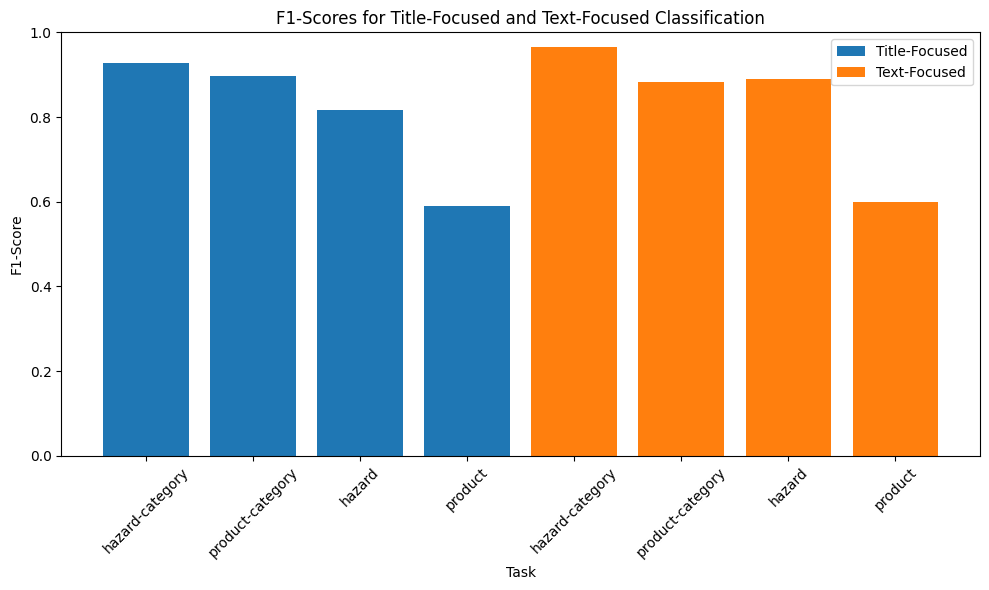

In [15]:
# Plotting the data
plt.figure(figsize=(10, 6))

index_title = range(len(f1_scores_title_df))  # Position for Title-Focused
index_text = [i + len(f1_scores_title_df) for i in range(len(f1_scores_text_df))]  # Position for Text-Focused

# Plotting all Title-Focused F1-scores
plt.bar(index_title, f1_scores_title_df['F1-Score'], label='Title-Focused')

# Plotting all Text-Focused F1-scores (shifted on the x-axis after the Title-Focused bars)
plt.bar(index_text, f1_scores_text_df['F1-Score'], label='Text-Focused')

# Adding labels and title
plt.xlabel('Task')
plt.ylabel('F1-Score')
plt.title('F1-Scores for Title-Focused and Text-Focused Classification')

# Adjusting x-ticks to show all tasks
plt.xticks(range(len(f1_scores_title_df) + len(f1_scores_text_df)),
           list(f1_scores_title_df['Task']) + list(f1_scores_text_df['Task']),
           rotation=45)

# Setting y-axis limit from 0 to 1
plt.ylim(0, 1)

# Adding legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


## Justification for Using F1-Weighted for Model Comparison:

**1. Balanced Measure of Precision and Recall:**  
The F1-weighted score balances precision and recall, making it ideal for imbalanced datasets like those with overrepresented classes (e.g., allergens or ice cream). It offers a more reliable performance metric by considering both correct positive predictions and capturing actual positives.

**2. Handling Class Imbalance:**  
F1-weighted addresses class imbalances by giving more weight to frequent categories while ensuring underrepresented classes are considered, making it a better fit for datasets with skewed distributions.

**3. Avoiding the "Accuracy Paradox":**  
In imbalanced datasets, accuracy can be misleading. F1-weighted helps by evaluating both precision and recall, avoiding the "accuracy paradox" where a model may predict the majority class well but fail on important minority classes.

**4. Handling Undefined F1-Score:**  
When some classes are absent from predictions, F1-weighted with `zero_division=0` ensures meaningful results, allowing for fair model comparison even with missing or rare classes.


## Analysis of F1-Scores


# Collected F1-Scores for Title-Focused Classification (Augmented Data)

| Task               | F1-Score |
|--------------------|----------|
| hazard-category    | 0.9266   |
| product-category   | 0.8972   |
| hazard             | 0.8169   |
| product            | 0.5898   |

### Analysis:
- **hazard-category**: F1-Score = 0.9266  
  Excellent performance, indicating the model effectively identifies hazard categories from titles even in the augmented dataset.

- **product-category**: F1-Score = 0.8972  
  Very strong results in classifying product categories from titles, showcasing the model's ability to generalize well with the augmented data.

- **hazard**: F1-Score = 0.8169  
  Good performance in predicting specific hazards from titles. However, further improvement might enhance granularity.

- **product**: F1-Score = 0.5898  
  Moderate performance, reflecting some challenges in extracting product-related information from short titles. This task remains a weaker area compared to others.

---

# Collected F1-Scores for Text-Focused Classification (Augmented Data)

| Task               | F1-Score |
|--------------------|----------|
| hazard-category    | 0.9643   |
| product-category   | 0.8834   |
| hazard             | 0.8887   |
| product            | 0.6004   |

### Analysis:
- **hazard-category**: F1-Score = 0.9643  
  Outstanding performance, showing the model's ability to extract hazard categories from longer descriptions with exceptional accuracy.

- **product-category**: F1-Score = 0.8834  
  Strong classification results for product categories in text-focused tasks, though slightly lower than title-based classification.

- **hazard**: F1-Score = 0.8887  
  Excellent performance in identifying hazards from full-text descriptions. The richer context provided by longer texts clearly benefits this task.

- **product**: F1-Score = 0.6004  
  Slight improvement over title-based classification, but product-related tasks still represent a significant challenge.

---

## Key Insights:
- **Enhanced Performance with Text**:  
  Across most tasks, text-focused classification outperforms title-focused classification, demonstrating the importance of contextual richness for better predictions.

- **Hazard-Related Strengths**:  
  Both **hazard-category** and **hazard** classifications show high F1-scores, especially when using longer text descriptions. The model is adept at leveraging augmented data for hazard-related tasks.

- **Persistent Challenges in Product Classification**:  
  Despite slight improvements in text-focused tasks, product classification remains the weakest area. This indicates a need for targeted improvements such as refined features or enhanced dataset diversity.

---

## Conclusion:
The augmented data significantly improves overall model performance, particularly in hazard-related tasks. The **text-focused classification** approach demonstrates superior results and will likely be the foundation for further model fine-tuning and evaluation. The next steps should prioritize addressing the persistent challenges in **product-related tasks** through data and model enhancements.
